### Question 1 (3 points): Photo Sketching – Take Your Photo
Take a photo of yourself and create a pencil sketch version of it, similar to the example shown.

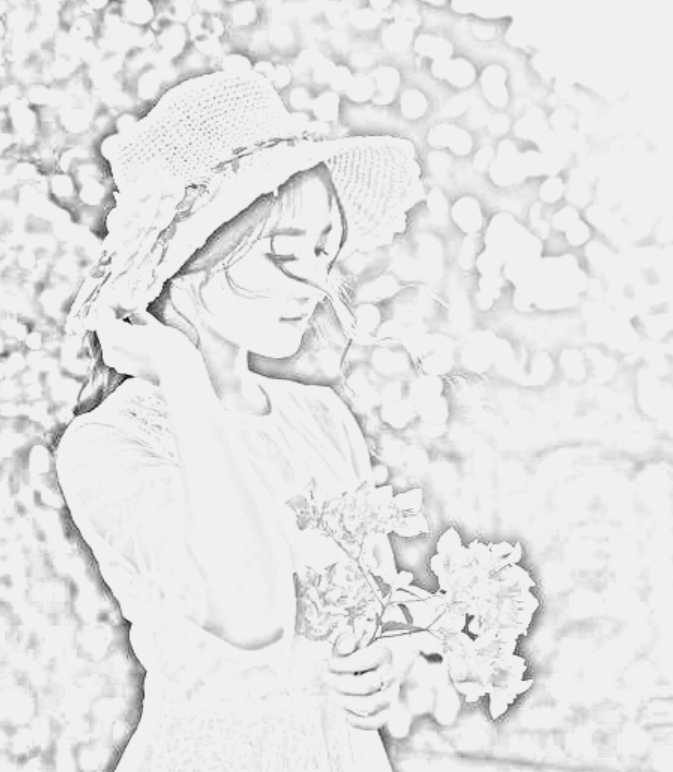


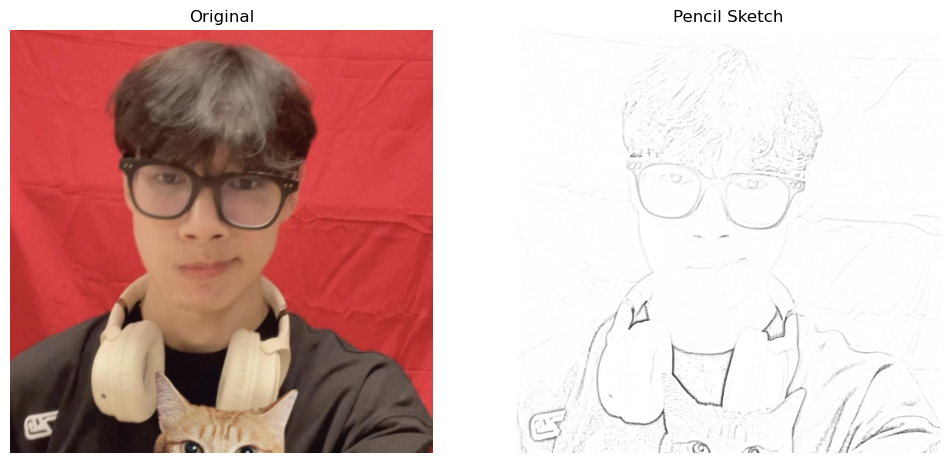

In [6]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh gốc (ảnh màu)
img = cv2.imread("avt.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Chuyển ảnh sang ảnh xám
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Invert ảnh
inverted_img = 255 - gray_img

# Làm mờ ảnh bằng GaussianBlur
blur_img = cv2.GaussianBlur(inverted_img, (21, 21), sigmaX=0, sigmaY=0)

# Tạo hiệu ứng sketch
sketch_img = cv2.divide(gray_img, 255 - blur_img, scale=256.0)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Pencil Sketch")
plt.imshow(sketch_img, cmap='gray')
plt.axis("off")

plt.show()


### Question 2 (3 points) Segment the image using K-means clustering, similar to the example image provided (4 points) 

- Find the optimal number of clusters (k) using the elbow method (plot)
- Visualize the segmented image as following.

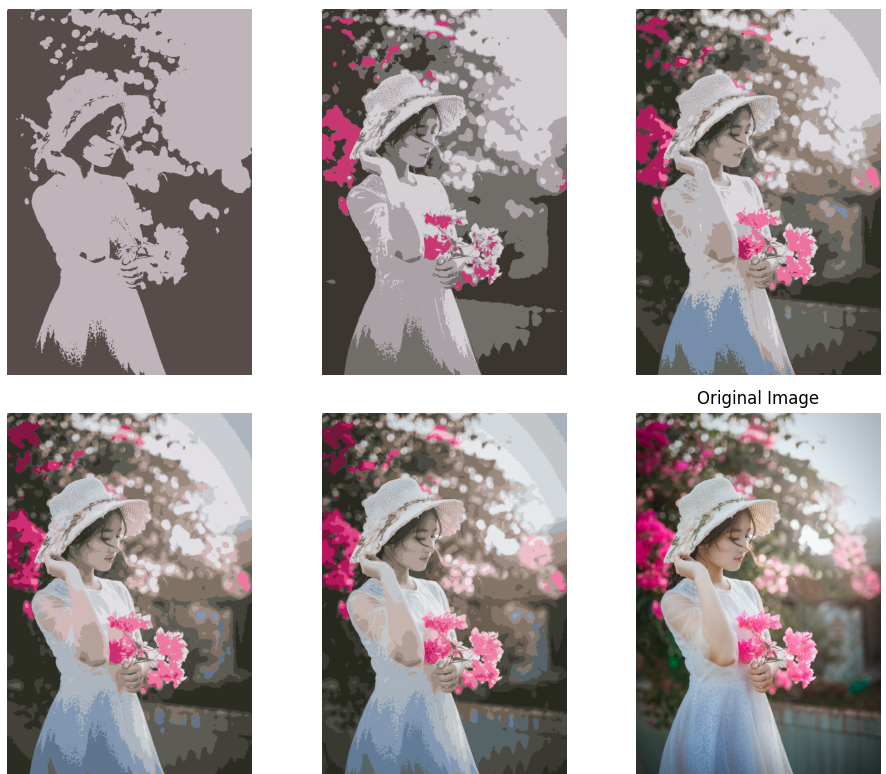

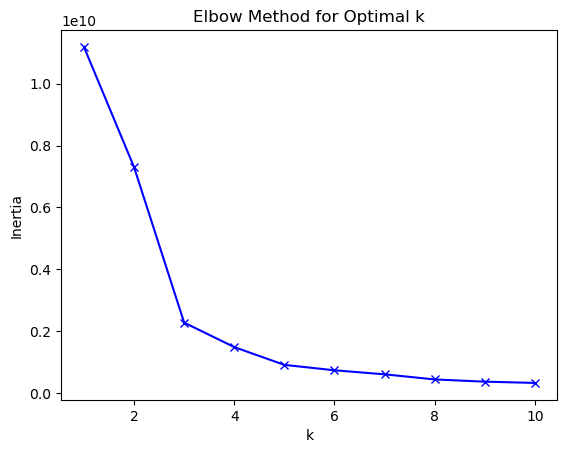

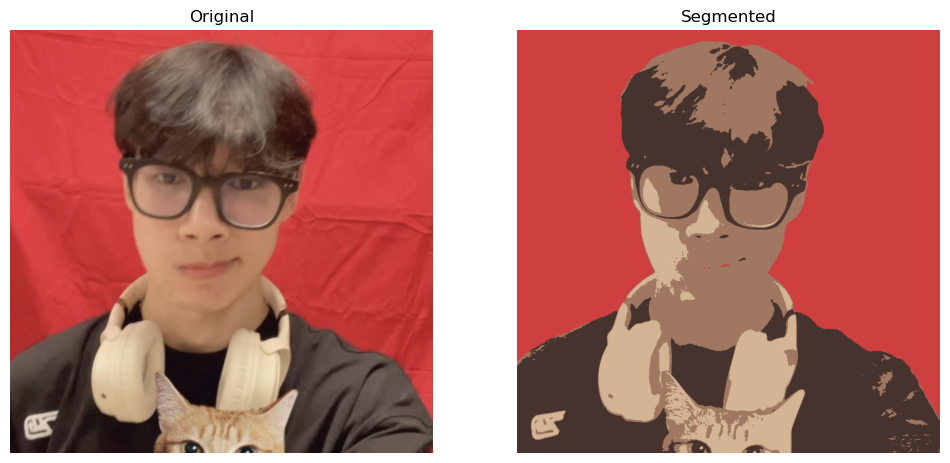

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Đọc ảnh
img = cv2.imread("avt.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pixel_values = img_rgb.reshape((-1, 3)).astype(np.float32)

# Elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Phân cụm với k=4 (giả định sau khi xem biểu đồ)
kmeans = KMeans(n_clusters=4, random_state=42).fit(pixel_values)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img_rgb.shape).astype(np.uint8)

# Hiển thị ảnh phân đoạn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented")
plt.imshow(segmented_img)
plt.axis("off")

plt.show()


### Question 3 ( 4 points): Given an image with several white dots on a black background:
- Count the total number of white dots and compute each dot’s area in pixels. Circle the smallest and largest dots by area.
- Calculate the total real-world area (in cm²) covered by all dots, assuming the image represents 10 cm × 10 cm.
Assume the actual size of the image corresponds to 10 cm × 10 cm.


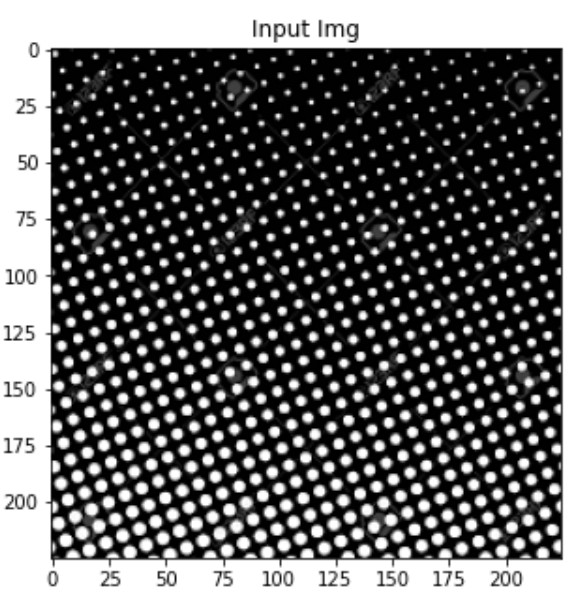

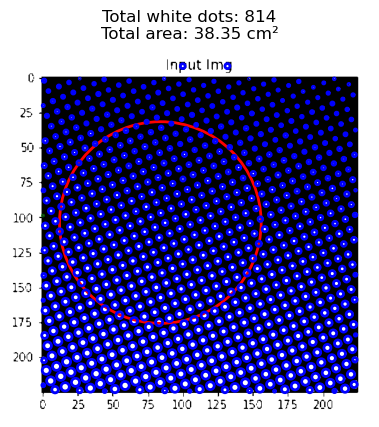

In [9]:
from skimage import measure
from matplotlib.patches import Circle

# Đọc ảnh nhị phân
img = cv2.imread("dot.png", cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Nhãn từng vùng chấm
labels = measure.label(binary, connectivity=2)
props = measure.regionprops(labels)

areas = [p.area for p in props]
min_idx = np.argmin(areas)
max_idx = np.argmax(areas)

# Tính tổng diện tích ảnh
height, width = img.shape
pixel_area_cm2 = (10 * 10) / (height * width)  # mỗi pixel chiếm bao nhiêu cm2
total_area = sum(areas) * pixel_area_cm2

# Hiển thị kết quả
fig, ax = plt.subplots()
ax.imshow(binary, cmap='gray')

for i, prop in enumerate(props):
    y, x = prop.centroid
    r = (prop.equivalent_diameter) / 2
    color = 'blue'
    if i == min_idx:
        color = 'green'
    elif i == max_idx:
        color = 'red'
    circle = Circle((x, y), r, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(circle)

plt.title(f"Total white dots: {len(areas)}\nTotal area: {total_area:.2f} cm²")
plt.axis("off")
plt.show()


### Option: 
Generate a cartoon-style version of an image using a Deep Convolutional GAN (DCGAN) or a suitable GAN-based architecture.

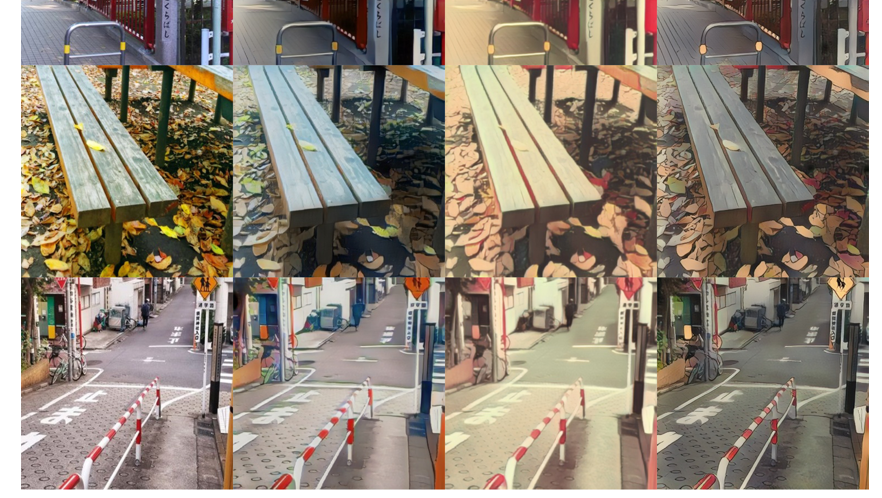